In [163]:
import pandas as pd

In [164]:
import numpy as np

# CONVERTING GOOGLE SHEETS TO A CSV FILE  

In [165]:
sheet_id = "1HbTO-7yTR-7BIUVv2BiiPcGwViPoxp4Y"

In [166]:
sheet_name = "Sheet1"

In [167]:
xls_url ="https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id , sheet_name)

In [168]:
xls_url

'https://docs.google.com/spreadsheets/d/1HbTO-7yTR-7BIUVv2BiiPcGwViPoxp4Y/gviz/tq?tqx=out:csv&sheet=Sheet1'

In [169]:
df = pd.read_csv(xls_url , header=None , names =['careers'])

In [170]:
df.head(10)

,careers
0,cokter
1,dentiists
2,Enginir
3,PoLICE
4,engneiear
5,DOcTRO
6,dentists
7,POLICE
8,enjeineaar
9,DENTISTT


# CREATING A LIST OF CORRECT WORDS

In [171]:
correct_words = ['DOCTOR','TEACHER','LAYWER','ENGINEER','ACCOUNTANT','NURSE','POLICE','ARCHITECT','DENTIST','PHARMACIST']

# HERE I AM USING LAVENSHTEIN DISTANCE METHOD TO SOLVE THE PROBLEM

In [172]:
# Define a function to correct spelling mistakes using Levenshtein Distance algorithm

def correct_spelling(word, dictionary):
    min_distance = float('inf')
    closest_word = word.lower() # Convert input word to lowercase
    
    # Iterate over each word in the dictionary
    for correct_word in dictionary:
        # Calculate Levenshtein Distance(ignoring case-sensitivity)
        distance = levenshtein_distance(word.lower(), correct_word.lower()) 
        
        # Update closest word if distance is smaller
        if distance < min_distance:
            min_distance = distance
            closest_word = correct_word
            
    
    return closest_word

In [173]:
# Define a function to calculate Levenshtein Distance between two words
def levenshtein_distance(word1, word2):
    
    # Initialize matrix with zeros using NumPy
    matrix = np.zeros((len(word1) + 1, len(word2) + 1), dtype=int)
    
    # Initialize first row and column
    matrix[:, 0] = np.arange(len(word1) + 1)
    matrix[0, :] = np.arange(len(word2) + 1)
    
    # Fill in the matrix
    for i in range(1, len(word1) + 1):
        for j in range(1, len(word2) + 1):
            if word1[i - 1] == word2[j - 1]:
                cost = 0
            else:
                cost = 1
            matrix[i, j] = min(matrix[i - 1, j] + 1,  # Deletion
                               matrix[i, j - 1] + 1,  # Insertion
                               matrix[i - 1, j - 1] + cost)  # Substitution
            
    # Return the bottom-right element of the matrix
    return matrix[len(word1), len(word2)]

# CREATING CORRECTED RESPONSES LIST

In [174]:
corrected_responses = []

# Iterate over each response and correct the spelling
# Clean up the data by applying the spelling correction function to each response

for index in range(len(df)):
    corrected_response = correct_spelling(df.loc[index , "careers"],correct_words)
    corrected_responses.append(corrected_response)
    

# ADDING THE CORRECTED RESPONSES LIST TO THE DATA FRAME

In [175]:
df["corrected"] = corrected_responses

In [176]:
df.head(50)

,careers,corrected
0,cokter,DOCTOR
1,dentiists,DENTIST
2,Enginir,ENGINEER
3,PoLICE,POLICE
4,engneiear,ENGINEER
5,DOcTRO,DOCTOR
6,dentists,DENTIST
7,POLICE,POLICE
8,enjeineaar,ENGINEER
9,DENTISTT,DENTIST


# COUNTING THE FREQUENCY OF EACH CAREER CHOICE

In [177]:
career_counts = {}
for response in corrected_responses:
    if response in career_counts:
        career_counts[response] += 1
    else:
        career_counts[response] = 1

In [178]:
print(career_counts)

{'DOCTOR': 225, 'DENTIST': 192, 'ENGINEER': 328, 'POLICE': 162, 'NURSE': 85, 'TEACHER': 195, 'ARCHITECT': 63, 'ACCOUNTANT': 32, 'PHARMACIST': 42, 'LAYWER': 82}


# PLOTTING THE GRAPH FOR  FREQUENCY V/S CAREER CHOICES

In [179]:
import matplotlib.pyplot as plt

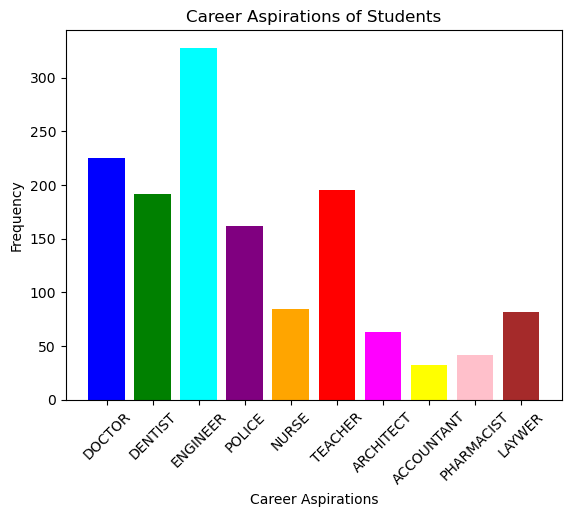

In [180]:
# Define colors for each bar
colors = ['blue', 'green', 'cyan', 'purple', 'orange' , 'red' , 'magenta' , 'yellow' , 'pink' , 'brown']

# Plot the career aspirations of students using Matplotlib with colorful bars
plt.bar(career_counts.keys(), career_counts.values(), color=colors)
plt.xlabel('Career Aspirations')
plt.ylabel('Frequency')
plt.title('Career Aspirations of Students')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()